# 필요한 라이브러리 import

In [1]:
import matplotlib.pyplot as plt #시각화 모듈
import numpy as np # ndarray(배열)
import pandas as pd # DataFrame, Series
import seaborn as sns #시각화 모듈, 예제 데이터셋

# 데이터 셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# `matplotlib.pyplot` 모듈을 사용한 시각화

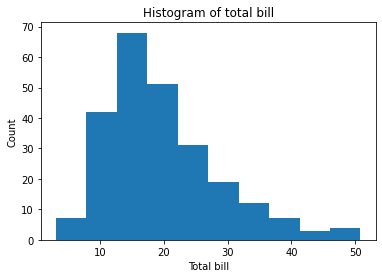

In [6]:
# 1. figure 객체 생성 #그림을 그리기 위한 스케치
fig = plt.figure()

# 2. figure 객체에 subplot(들)을 추가
# figure.add_subplot(nrows, ncols, index):subplot의 행 개수, 열 개수, 위치(인덱스)
# axis = fig.add_subplot(1,1,1)

# figure.add_subplot(pos):'행/열/위치'순서로 만들어진 3자리 정수
axis = fig.add_subplot(111)

# 3. 각각의 subplot에 그래프를 그림.
axis.hist(x=tips['total_bill']) #total bill의 히스토그램(histogram)

# 4. 그래프 옵션(들)을 설정.
axis.set_title('Histogram of total bill')
axis.set_xlabel('Total bill')
axis.set_ylabel('Count')

# 5. 그래프 보여주기.
plt.show()

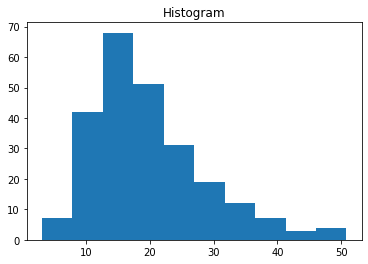

In [7]:
# 1. figure 객체 생성 + subplot 추가
fig, ax = plt.subplots()  # nrows=1, ncols=1: default argument
# print(fig)
# print(ax)

# 2. subplot에 그래프를 그림
ax.hist(x=tips['total_bill'])

# 3. 옵션 설정
ax.set_title('Histogram')

# 4. 그래프 보여줌.
plt.show()

* 2차원 리스트 : list`[i][j]`

* 2차원 배열 :
array`[i][j]`, array`[i,j]`

* 3차원 리스트: list`[i][j][k]`

* 3차원 배열(ndarray)
array`[i][j][k]`, array`[i,j,k]`

1개의 figure에 1개의 subplot만 있는 경우에는, `pyplot`모듈의 top-level(plot, scatter, hist, boxplot, ...) 그래프 함수를 직접 이용할 수도 있음.

top-level 함수를 사용하면 figure 생성과 1개의 subplot 추가를 별도의 코드로 작성할 필요가 없음.

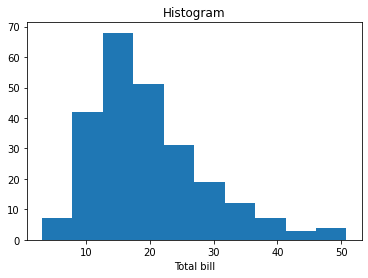

In [8]:
# figure 생성 + subplot을 추가 + 그래프 추가
plt.hist(x=tips['total_bill'])

# 옵션 설정
plt.title('Histogram')
plt.xlabel('Total bill')

# 그래프 보여주기
plt.show()

#Exercise

* 1개의 figure에 2개의 suplot들을 위/아래로 배치.
* 위쪽 subplot에는 total_bill 히스트로그램을 그림.
* 아래쪽 subplot에는 x축은 total_bill, y축은 tip으로 하는 산점도 그래프.

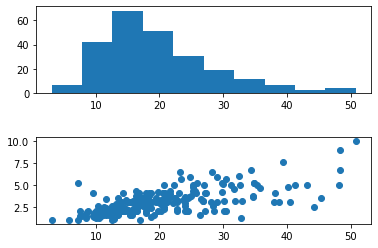

In [9]:
#5번과정
fig = plt.figure()
axis1 = fig.add_subplot(211)
axis1.hist(x=tips['total_bill'])
axis2 = fig.add_subplot(212)
axis2.scatter(x=tips['total_bill'], y=tips['tip'])

plt.subplots_adjust(hspace=0.5) #subplot과의 horizontal space
plt.show()

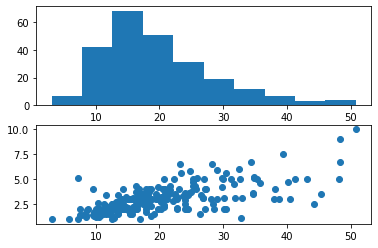

In [10]:
fig, axes = plt.subplots(2,1)

#fig: figure 객체
#axes: subplot 객체들의 배열(ndarray)
#print(axes)
axes[0].hist(x=tips['total_bill'])
axes[1].scatter(x=tips['total_bill'], y=tips['tip'])
plt.show()

* 1개의 figure에 2개의 suplot들을 좌/우로 배치.
* 왼쪽 subplot에는 total_bill 히스트로그램을 그림.
* 오른쪽 subplot에는 x축은 total_bill, y축은 tip으로 하는 산점도 그래프.

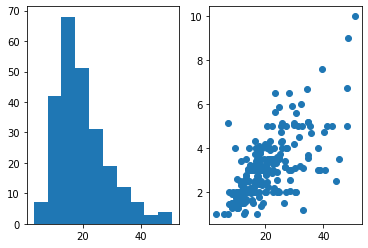

In [11]:
#5번과정
fig = plt.figure()
axis = fig.add_subplot(121)
axis.hist(x=tips['total_bill'])
axis = fig.add_subplot(122)
axis.scatter(x=tips['total_bill'], y=tips['tip'])
plt.show()

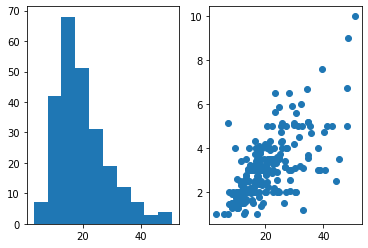

In [12]:
fig, ax = plt.subplots(1,2)
ax[0].hist(x=tips['total_bill'])
ax[1].scatter(x=tips['total_bill'], y=tips['tip'])
plt.show()

#Box plot

숫자 타입 변수(컬럼)의 기술 통계량(최솟값, 25%, 50%, 75%, 최댓값) 시각화.

데이터들이 어느 정도 분산되어 있는지, 이상치(outlier)들이 있는지 등을 확인.

In [13]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

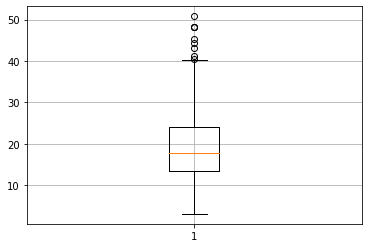

In [14]:
plt.boxplot(tips.total_bill)
plt.grid() #옵션
plt.show()

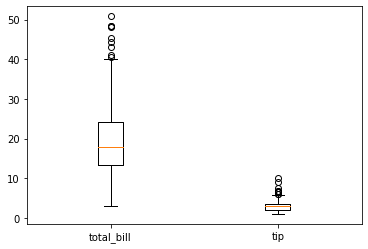

In [15]:
# 1개의 figure와 subplot 안에 total_bill의 box plot, tip의 box plot을 시각화.
plt.boxplot(x=[tips['total_bill'],tips['tip']],labels=['total_bill','tip'])
plt.show()

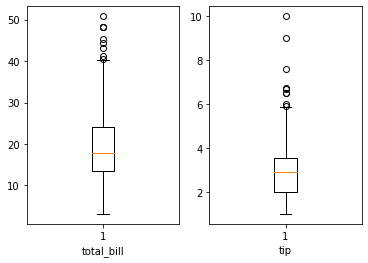

In [34]:
fig, ax = plt.subplots(1,2)
ax[0].boxplot(x=tips.total_bill)
ax[1].boxplot(x=tips.tip)
ax[0].set_xlabel('total_bill')
ax[1].set_xlabel('tip')
plt.show()

* 성별 tip의 box plot

In [17]:
male_tip = tips[tips['sex'] =='Male']['tip']
male_tip.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [16]:
female_tip = tips[tips['sex'] =='Female']['tip']
female_tip.describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

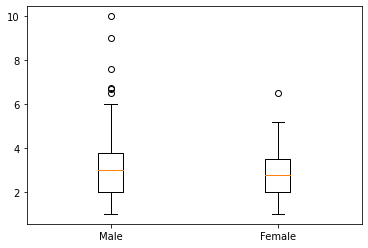

In [18]:
plt.boxplot(x=np.array([male_tip, female_tip], dtype='object'), labels=['Male','Female'])

plt.show()

#np.array = ndarray 만드는 함수

* 시간별 tip의 box plot

In [19]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [20]:
dinner_tip= tips[tips['time']=='Dinner']['tip']
dinner_tip.describe()

count    176.000000
mean       3.102670
std        1.436243
min        1.000000
25%        2.000000
50%        3.000000
75%        3.687500
max       10.000000
Name: tip, dtype: float64

In [21]:
lunch_tip= tips[tips['time']=='Lunch']['tip']
lunch_tip.describe()

count    68.000000
mean      2.728088
std       1.205345
min       1.250000
25%       2.000000
50%       2.250000
75%       3.287500
max       6.700000
Name: tip, dtype: float64

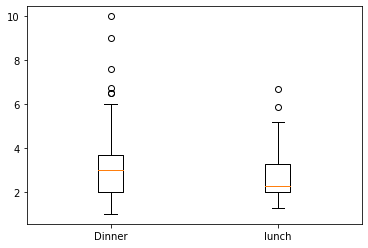

In [22]:
plt.boxplot(x=np.array([dinner_tip, lunch_tip], dtype='object'), labels=['Dinner','lunch'])

plt.show()

In [23]:
# 요일별 tip의 box plot
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [24]:
sun_tip = tips[tips['day']=='Sun']['tip']
sat_tip = tips[tips['day']=='Sat']['tip']
fri_tip = tips[tips['day']=='Fri']['tip']
thur_tip = tips[tips['day']=='Thur']['tip']

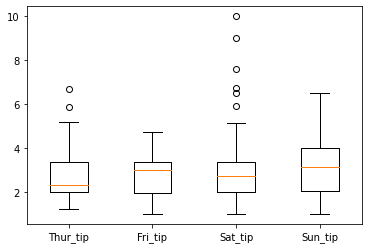

In [25]:
plt.boxplot(x=np.array([thur_tip, fri_tip, sat_tip, sun_tip], dtype='object'), labels=['Thur_tip','Fri_tip','Sat_tip','Sun_tip'])
plt.show()

# Histogram

연속형 자료를 구간으로 나눠서 구간 안에 포함된 자료의 개수를 막대로 표현한 그래프.

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


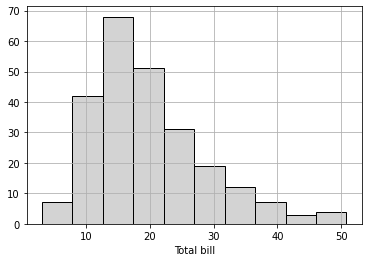

In [43]:
plt.hist(x=tips.total_bill,  # 히스토그램을 그리기 위한 연속형 자료
         bins=10,            # 막대의 개수 또는 나누는 구간
         edgecolor='black',  # 막대의 테두리 색깔
         color='lightgray')  # 막대 내부 색깔

plt.grid()  # 격자 보조선
plt.xlabel('Total bill')
plt.show()

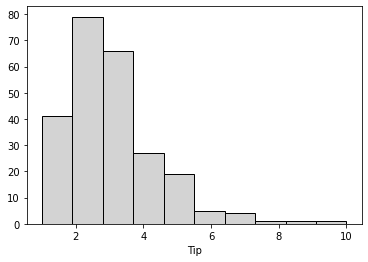

In [47]:
# tip의 히스토그램
plt.hist(x=tips.tip,
         bins=10,
         edgecolor='black',
         color='lightgray')
plt.xlabel('Tip')
plt.show()

In [48]:
#카테고리 타입 변수의 순서
tips.day.cat.categories

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

In [ ]:
#카테고리 타입 변수를 카테고리 순서로 출력:
# data_frame.column.cat.categories
# data_frame['column'].cat.categoris


# 막대그래프

카테고리 타입 자료의 빈도수를 막대로 표현한 그래프.

In [53]:
#성별 빈도수
gender_counts = tips.sex.value_counts() #인덱스와 값 확인
gender_counts

Male      157
Female     87
Name: sex, dtype: int64

## 세로 막대 그래프 (Vertical bar plot)

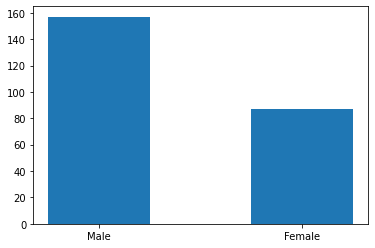

In [61]:
plt.bar(x=gender_counts.index, 
        height=gender_counts.values,
        width=0.5)
plt.show()

## 가로막대그래프(horizontal bar plot)

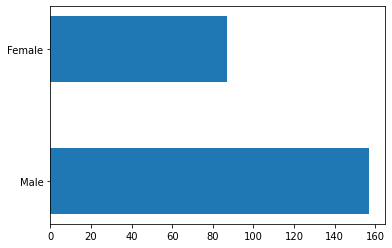

In [63]:
plt.barh(y=gender_counts.index, 
        width=gender_counts.values,
        height=0.5)
plt.show()

* size의 빈도수를 세로/가로 막대그래프

In [76]:
size_bin = tips['size'].value_counts()
size_bin

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

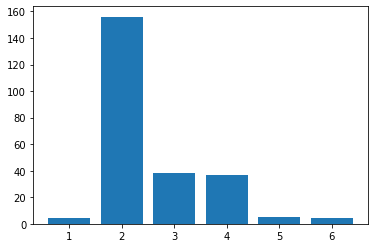

In [77]:
plt.bar(x=size_bin.index, height=size_bin.values)
plt.show()

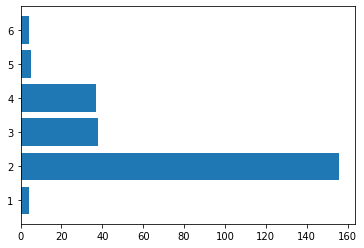

In [78]:
plt.barh(y=size_bin.index, width=size_bin.values)
plt.show()

In [85]:
gender_counts = tips.sex.value_counts()
smoker_counts = tips.smoker.value_counts()
day_counts = tips.day.value_counts()
time_counts = tips.time.value_counts()

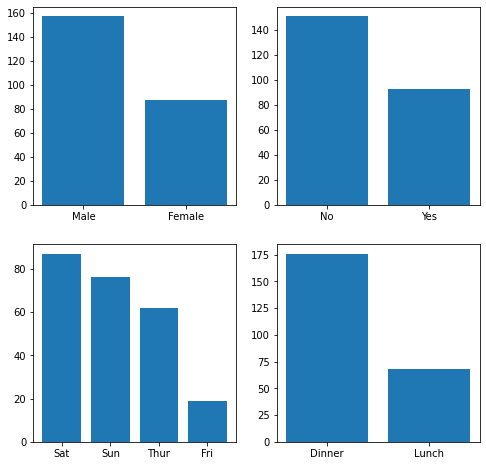

In [89]:
fig, ax = plt. subplots(2,2,figsize=(8,8))
ax[0,0].bar(x=gender_counts.index, height=gender_counts.values)
ax[0,1].bar(x=smoker_counts.index, height=smoker_counts.values)
ax[1,0].bar(x=day_counts .index, height=day_counts .values)
ax[1,1].bar(x=time_counts.index, height=time_counts.values)

plt.show()

# 산점도(Scatter plot)

두 변수 (컬럼)의 상관관계를 파악할 때 사용.

`y ~ x` 관계 표현: y는 관심(종속) 변수, x는 독립 변수.


In [90]:
tips.head() #tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


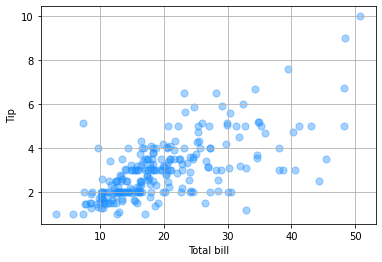

In [96]:
plt.scatter(x=tips.total_bill, y=tips.tip,  # x축, y축에 사용할 자료
            alpha=0.4,  # 투명도: 0 ~ 1까지 값을 사용. 0에 가까울 수록 투명. 1에 가까울 수록 불투명.
            s=50,  # 마커(점)의 크기(size)
            c='dodgerblue',  # 마커의 색깔(color)
            marker='o')  # 마커 모양(o, s, ^, v, *, +, ...)

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()
plt.show()

* tip ~ total_bill의 산점도
* 남성인 경우에는 마커 색깔을 blue, 여성인 경우에는 마커 색깔을 red

In [117]:
male = tips[tips['sex']=='Male']
female = tips[tips['sex']=='Female']

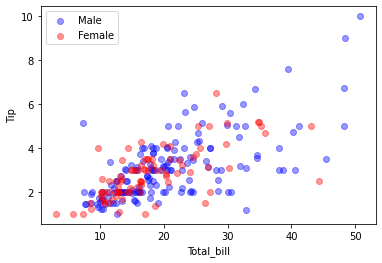

In [127]:
plt.scatter(x=male.total_bill, y=male.tip,
            c='blue',alpha=0.4,label='Male')
plt.scatter(x=female.total_bill, y=female.tip,
            c='red',alpha=0.4, label='Female')

plt.xlabel('Total_bill')
plt.ylabel('Tip')

plt.legend()
plt.show()

* tip ~ total_bill의 산점도
* 성별에 따라 마커의 색깔을 다르게 표현
* 흡연여부에 따라 마커의 모양을 다르게 포현.

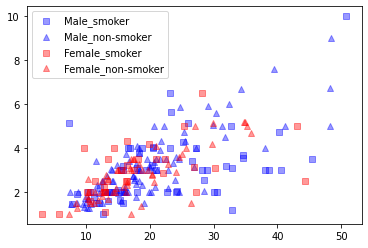

In [143]:
male_smoker = tips[(tips.sex =='Male')& (tips.smoker=='Yes')]
male_nonsmoker = tips[(tips.sex =='Male')& (tips.smoker=='No')]
female_smoker = tips[(tips.sex =='Female')& (tips.smoker=='Yes')]
female_nonsmoker = tips[(tips.sex =='Female')& (tips.smoker=='No')]

plt.scatter(x=male_smoker.total_bill, y=male_smoker.tip,
            marker='s', c= 'blue',alpha=0.4, label='Male_smoker')
plt.scatter(x=male_nonsmoker.total_bill, y=male_nonsmoker.tip,
            marker='^',c= 'blue',alpha=0.4,label='Male_non-smoker')
plt.scatter(x=female_smoker.total_bill, y=female_smoker.tip,
            marker='s', c= 'red',alpha=0.4,label='Female_smoker')
plt.scatter(x=female_nonsmoker.total_bill, y=female_nonsmoker.tip,
            marker='^',c= 'red',alpha=0.4, label='Female_non-smoker')

plt.legend()
plt.show()

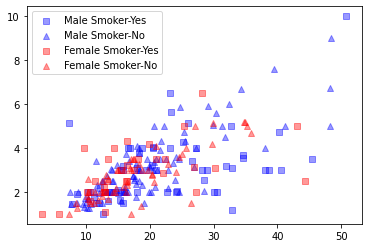

In [151]:
gender = tips.sex.cat.categories
smoker = tips.smoker.cat.categories

colors = ['blue' , 'red'] # 성별에 따른 색깔 구분을 위해서 (남성-blue, 여성-red)
markers = ['s', '^'] # 

for g, c in zip(gender, colors):
    for s, m in zip(smoker, markers):
        subset_df = tips[(tips.sex==g)&(tips.smoker==s)]
        plt.scatter(x=subset_df.total_bill, y=subset_df.tip,
                    c=c, marker=m, alpha=0.4, label=f'{g} Smoker-{s}')
        
plt.legend()
plt.show()

# 선그래프 (Line plot)

시계열 그래프(주식 가격, 환율, 미세먼지 농도, 코로나 확진자 수 , ...) 를표현


In [169]:
# 선 그래프를 위한 가상의 데이터 프레임 작성.
np.random.seed(1)  # 난수가 생성되는 순서를 유지시키기 위해서.
df = pd.DataFrame({'x1': np.arange(10),
                   'x2': np.random.rand(10)})
df

,x1,x2
0,0,0.417022
1,1,0.720324
2,2,0.000114
3,3,0.302333
4,4,0.146756
5,5,0.092339
6,6,0.186260
7,7,0.345561
8,8,0.396767
9,9,0.538817


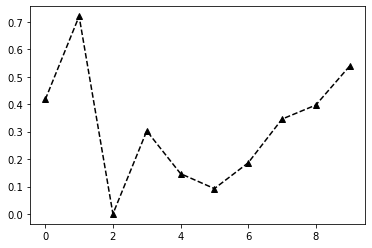

In [171]:
plt.plot(df.x1, df.x2, 'k^--')
# plot 함수의 3번째 argument - format string: 'color-marker-line style'
# color: b(lue), r(ed), g(reen), (blac)k, ...
# marker: o, s, ^, v, ...
# line style: -(solid line), --(dashed line), :(dotted line), ...

plt.show()

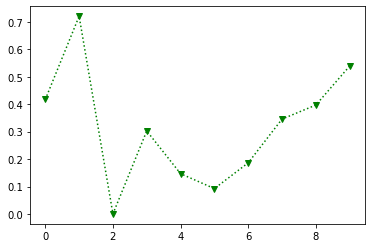

In [172]:
plt.plot(df.x1, df.x2, c='green', marker='v', linestyle='dotted')
plt.show()

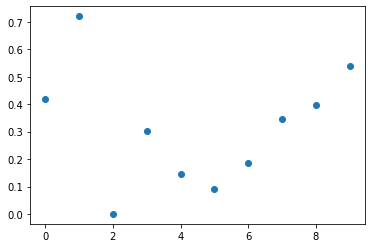

In [173]:
# plot 함수에서 linestyle을 없애버리면 산점도가 됨.
plt.plot(df.x1, df.x2, 'o')
plt.show()

In [162]:
np.random.seed(1)
df = pd.DataFrame({'y1': np.random.rand(10),
                   'y2': np.random.rand(10),
                   'y3': np.random.rand(10)})

df

,y1,y2,y3
0,0.417022,0.419195,0.800745
1,0.720324,0.685220,0.968262
2,0.000114,0.204452,0.313424
3,0.302333,0.878117,0.692323
4,0.146756,0.027388,0.876389
5,0.092339,0.670468,0.894607
6,0.186260,0.417305,0.085044
7,0.345561,0.558690,0.039055
8,0.396767,0.140387,0.169830
9,0.538817,0.198101,0.878143


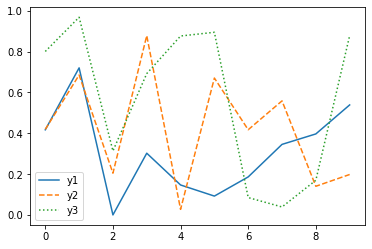

In [165]:
plt.plot(df.y1, label='y1', linestyle='-') #solid
plt.plot(df.y2, label='y2', linestyle='--') #dashed
plt.plot(df.y3, label='y3', linestyle=':') #dotted

plt.legend()
plt.show()

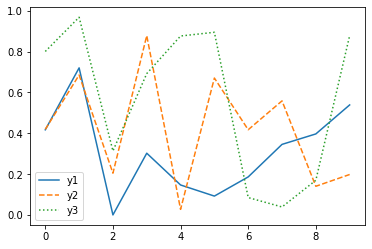

In [168]:
linestyles = ['solid','dashed','dotted']
for y, ls in zip(df.columns, linestyles):
    plt.plot(df[y], label=y, linestyle=ls)

plt.legend()
plt.show()